In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [39]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:", scores.std())

1. Frame the Problem and look at the big picture

2. Obtain Data

In [40]:
pre_bank_data = pd.read_csv("/content/drive/MyDrive/Data_Science_Datasets/Qualitative_Bankruptcy.csv", names=['Industrial Risk', 'Management Risk', 'Financial Flexibility','Credibility','Competitiveness','Operating Risk',
                                                                                                   'Class'])
pre_bank_data.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


3. Discover and visualize the data to gain insights

In [41]:
pre_bank_data.shape

(250, 7)

In [42]:
pre_bank_data.dtypes

Industrial Risk          object
Management Risk          object
Financial Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [43]:
pre_bank_data.dtypes.value_counts()

object    7
Name: count, dtype: int64

In [44]:
(
pre_bank_data
.isnull()
.any()
)

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

In [45]:
pre_bank_data.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [46]:
pre_bank_data["Class"].value_counts(normalize=True)

Class
NB    0.572
B     0.428
Name: proportion, dtype: float64

In [47]:
pre_bank_data["Industrial Risk"].value_counts(normalize=True)

Industrial Risk
N    0.356
A    0.324
P    0.320
Name: proportion, dtype: float64

In [48]:
pre_bank_data["Management Risk"].value_counts(normalize=True)

Management Risk
N    0.476
A    0.276
P    0.248
Name: proportion, dtype: float64

In [49]:
pre_bank_data["Financial Flexibility"].value_counts(normalize=True)

Financial Flexibility
N    0.476
A    0.296
P    0.228
Name: proportion, dtype: float64

In [50]:
pre_bank_data["Credibility"].value_counts(normalize=True)

Credibility
N    0.376
P    0.316
A    0.308
Name: proportion, dtype: float64

In [51]:
pre_bank_data["Operating Risk"].value_counts(normalize=True)

Operating Risk
N    0.456
P    0.316
A    0.228
Name: proportion, dtype: float64

In [52]:
competitiveness_counts = pre_bank_data['Competitiveness'].value_counts()
percentages = (competitiveness_counts / len(pre_bank_data)) * 100


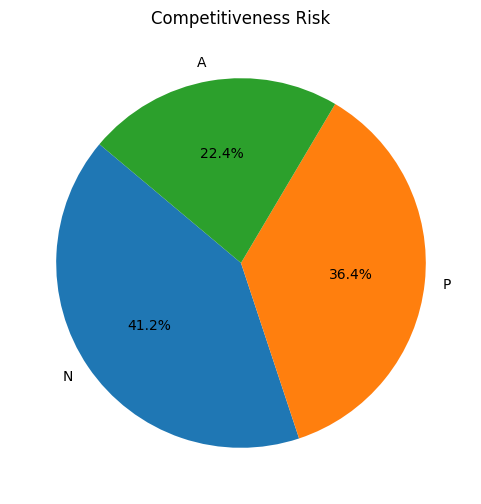

In [53]:
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=competitiveness_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Competitiveness Risk')
plt.show()

4. Prepare data for ML

In [54]:
bank_one_hot = pd.get_dummies(pre_bank_data, columns = ["Industrial Risk", "Management Risk", "Financial Flexibility",
                                         "Credibility", "Competitiveness", "Operating Risk" ])

In [55]:
bank_one_hot.head()

,Class,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P
0,NB,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True
1,NB,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,NB,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,NB,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True
4,NB,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False


In [56]:
y = bank_one_hot["Class"]
X = bank_one_hot.drop(columns = ["Class"])

print(f"the shape of the inputs X is: {X.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs X is: (250, 18)
the shape of the targets y is: (250,)


In [57]:
X = X.replace({True: 1, False: 0})

In [58]:
y = y.replace({"NB":1,"B":0})

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
clf = LogisticRegression(penalty = 'l2', solver = 'lbfgs')

In [74]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'precision')
display_scores(cv_scores)

Scores: [1.         1.         1.         0.95833333 1.        ]
Mean: 0.9916666666666668
Standard deviation: 0.016666666666666653


In [62]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [64]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1])

In [68]:
y_test.to_numpy()

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1])

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

